# Netflix Movies and TV Shows

<p style='text-align: justify;'>Netflix, Inc. is an American subscription streaming service and production company. Netflix was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. Netflix initially both sold and rented DVDs by mail, but the sales were eliminated within a year to focus on the DVD rental business. In 2007, Netflix introduced streaming media and video on demand. The company expanded to Canada in 2010, followed by Latin America and the Caribbean. Netflix entered the content production industry in 2013, debuting its first series House of Cards. In January 2016, it expanded to an additional 130 countries and then operated in 190 countries. As of December 31, 2021, Netflix had over 221.8 million subscribers worldwide, including 75.2 million in the United States and Canada, 74.0 million in Europe, the Middle East and Africa, 39.9 million in Latin America and 32.7 million in Asia-Pacific.</p>

Our goal in this project is to perform ***exploratory data analysis*** and try to obtain some information about Netflix content.

## *Table of Contents*

- [*Introduction*](#introduction)
    - [*Libraries*](#libraries)
    - [*Data Collection*](#data_collection)
- [*Analysis*](#analysis)
    - [*Q1: Who directed "Breaking Bad" and who was the star actor?*](#q1)
    - [*Q2: In which year were the most movies and TV shows released?*](#q2)
    - [*Q3: How many movies and TV shows are in the dataset?*](#q3)
    - [*Q4: What are the top 10 genres of movies and TV shows respectively?*](#q4)
    - [*Q5: Show all the movies that were released in 2000*](#q5)
    - [*Q6: What are the top 10 countries with most content?*](#q6)
    - [*Q7: Show all the TV shows that were released in any nordic country*](#q7)
    - [*Q8: Show the top 10 directors with most movies and TV shows in Netflix*](#q8)
    - [*Q9: Show all comedy movies starring either Jim Carrey or Jackie Chan*](#q9)
    - [*Q10: What are the different ratings defined by Netflix?*](#q10)
    - [*Q11: What is the duration of the longest movie?*](#q11)
    - [*Q12: Show the top 5 longest movies*](#q12)
    - [*Q13: What is the average duration of a movie?*](#q13)
    - [*Q14: What are the TV shows released between 2010-2015 with at least 5 seasons?*](#q14)
    - [*Q15: Show the actors with most appearances in movies and TV shows in US and UK*](#q15)

---

## Introduction <a class='anchor' id='introduction'></a>

### *Libraries* <a class='anchor' id='libraries'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

### *Data Collection* <a class='anchor' id='data_collection'></a>

- The data was acquired from [kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)
- However, the data was originally collected from [Flixable](https://flixable.com/), which is a third-party search engine
- The dataset consists of movies and TV shows that were available on Netflix up to 2021
- It includes meta-details about movies and TV shows such as title, director, cast, release year, rating, duration etc.

##### *Read the data*

In [2]:
df = pd.read_csv('./data/netflix_dataset.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8804, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8804 entries, 0 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6171 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.5+ KB


##### *Check for duplicate values*

In [6]:
print(f'There are {df.duplicated().sum()} duplicate values in our data.')

There are 0 duplicate values in our data.


##### *Plot missing values*

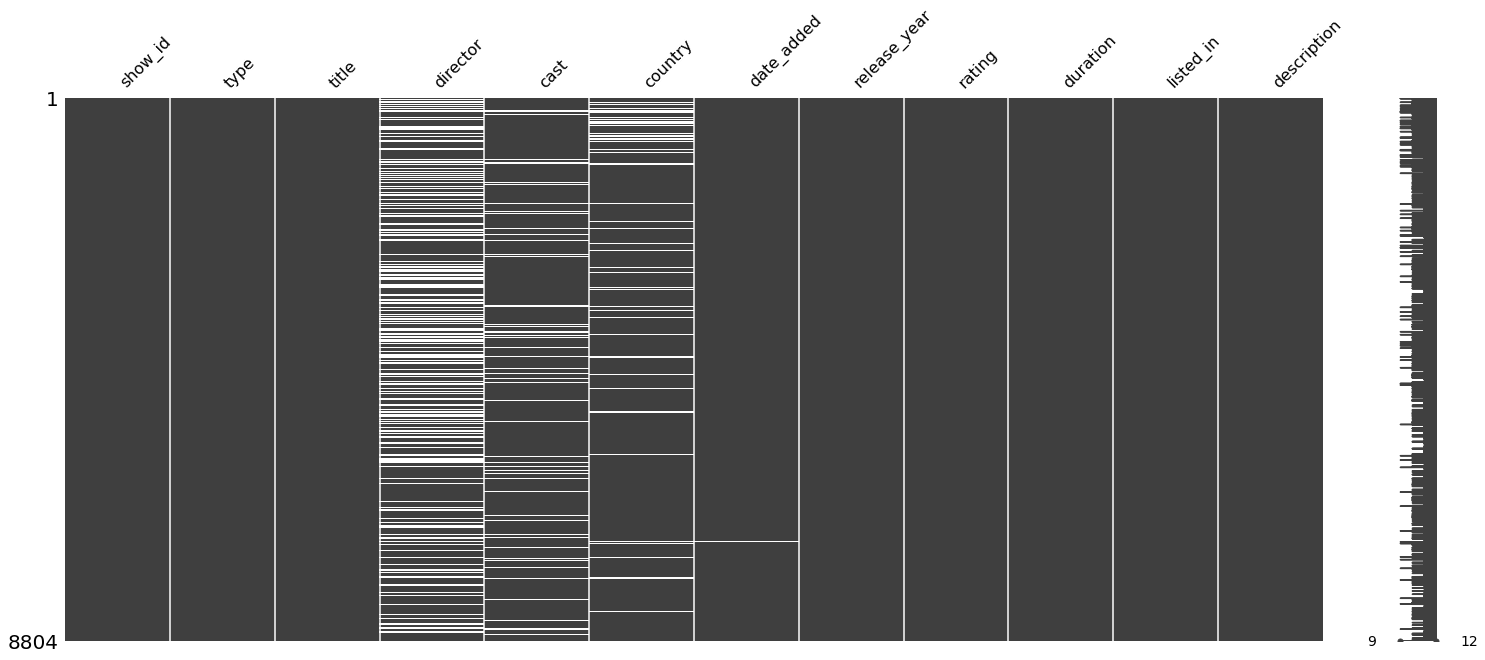

In [7]:
# create msno matrix
msno.matrix(df)

# plot the matrix
plt.show()

---

## Analysis <a class='anchor' id='analysis'></a>

### *Q1: Who directed "Breaking Bad" and who was the star actor?* <a class='anchor' id='q1'></a>

##### *Create a dataframe contaning only information about Breaking Bad*

In [8]:
breaking_bad = df[df['title'] == 'Breaking Bad']

In [9]:
breaking_bad

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5937,s5941,TV Show,Breaking Bad,Vince Gilligan,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...


##### *Get the director and the star actor*

In [10]:
# get director
director = breaking_bad.iloc[0,3]

# get star actor
star_act = breaking_bad.iloc[0,4].split(',')[0]

##### *Display the result*

In [11]:
print(f'The director of Breaking Bad was {director} and the star actor was {star_act}.')

The director of Breaking Bad was Vince Gilligan and the star actor was Bryan Cranston.


### *Question 2: In which year were the most movies and TV shows released?* <a class='anchor' id='q2'></a>

##### *Group movies and TV shows by year and count how many movies were released each year*

In [12]:
# group by year and get the number of releases per year
releases = df.groupby(['release_year'])['show_id'].count()

##### *Display the result*

In [13]:
print(f'Most movies and TV shows were released in {releases[releases == releases.max()].index[0]}.')

Most movies and TV shows were released in 2018.


##### *Plot the result*

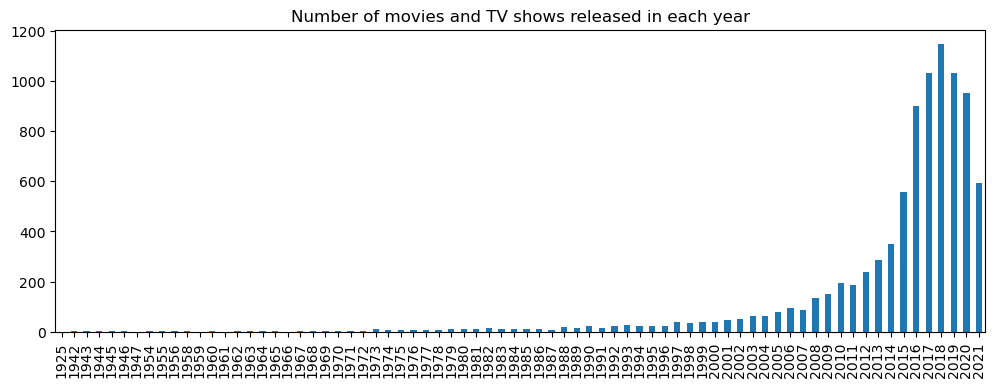

In [14]:
plt.figure(figsize=(12,4), dpi=100, facecolor='white')
releases.plot(kind='bar')
plt.xlabel(None)
plt.title('Number of movies and TV shows released in each year')
plt.savefig('./images/releases_per_year.svg')
plt.show()

### *Question 3: How many movies and TV shows are in the dataset?* <a class='anchor' id='q3'></a>

##### *Group movies and TV shows by type (movie or TV show) and get the count of each type*

In [15]:
# group by type and get the count of each type
movie_or_show = df.groupby('type')['show_id'].count()

##### *Display the result*

In [16]:
print(f'There are {movie_or_show[0]} movies and {movie_or_show[1]} tv shows.')

There are 6128 movies and 2676 tv shows.


##### *Plot the result*

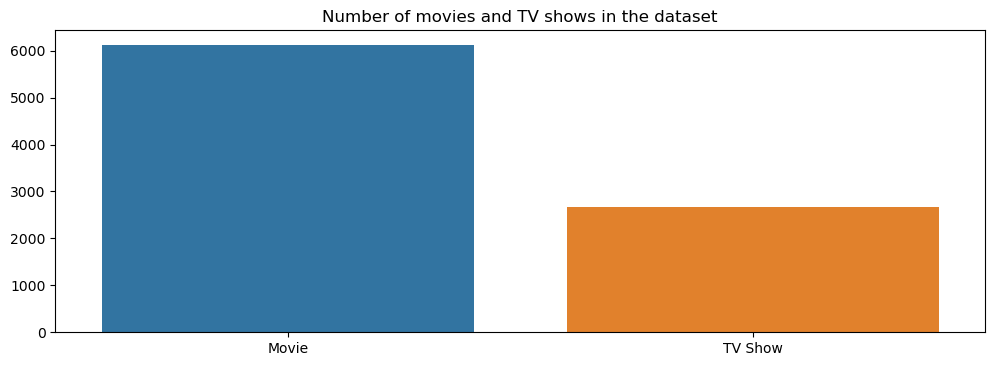

In [17]:
plt.figure(figsize=(12,4), dpi=100, facecolor='white')
sns.countplot(df['type'])
plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of movies and TV shows in the dataset')
plt.savefig('./images/movies_and_tv_shows.svg')
plt.show()

### *Question 4: What are the top 10 genres of movies and TV shows respectively?* <a class='anchor' id='q4'></a>

##### *Create a dataframe containing only movies*

In [18]:
# create df only with movies
df_movies = df[df['type'] == 'Movie']

In [19]:
df_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


##### *Find all distinct movie genres*

In [20]:
# get all movie genre values as tokens
gen_movies = ', '.join(df_movies['listed_in']).split(', ')

# count distinct movie genres and get the top 10
counter_movies = Counter(gen_movies).most_common(10)

##### *Display the top 10 genres of movies*

In [21]:
for i in range(10):
    if i < 9:
        print(f'0{i+1}: {counter_movies[i][0]} ({counter_movies[i][1]})')
    else:
        print(f'{i+1}: {counter_movies[i][0]} ({counter_movies[i][1]})')

01: International Movies (2752)
02: Dramas (2427)
03: Comedies (1674)
04: Documentaries (869)
05: Action & Adventure (859)
06: Independent Movies (756)
07: Children & Family Movies (641)
08: Romantic Movies (616)
09: Thrillers (577)
10: Music & Musicals (375)


##### *Create a dataframe containing only TV shows*

In [22]:
# create df only with tv shows
df_tvshows = df[df['type'] == 'TV Show']

In [23]:
df_tvshows.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


##### *Find all distinct TV show genres*

In [24]:
# get all tv show genre values as tokens
gen_tvshows = ', '.join(df_tvshows['listed_in']).split(', ')

# count distinct tv show genres and get the top 10
counter_tvshows = Counter(gen_tvshows).most_common(10)

##### *Display the top 10 genres of TV shows*

In [25]:
for i in range(10):
    if i < 9:
        print(f'0{i+1}: {counter_tvshows[i][0]} ({counter_tvshows[i][1]})')
    else:
        print(f'{i+1}: {counter_tvshows[i][0]} ({counter_tvshows[i][1]})')

01: International TV Shows (1351)
02: TV Dramas (763)
03: TV Comedies (581)
04: Crime TV Shows (470)
05: Kids' TV (451)
06: Docuseries (395)
07: Romantic TV Shows (370)
08: Reality TV (255)
09: British TV Shows (253)
10: Anime Series (176)


### *Question 5: Show all the movies that were released in 2000* <a class='anchor' id='q5'></a>

##### *Create a dataframe containing only movies that were released in 2000*

In [26]:
movies = df_movies[df_movies['release_year'] == 2000]

In [27]:
movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
180,s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",NaN,"September 1, 2021",2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ..."
350,s351,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2021",2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...
359,s360,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,"August 1, 2021",2000,R,111 min,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer..."


##### *Display the movies*

In [28]:
for i, title in enumerate(movies['title']):
    if i < 9:
        print(f'0{i+1}: {title}')
    else:
        print(f'{i+1}: {title}')

01: The Nutty Professor II: The Klumps
02: Space Cowboys
03: The Original Kings of Comedy
04: Charlie's Angels
05: Snow Day
06: Battlefield Earth
07: The Whole Nine Yards
08: Rugrats in Paris: The Movie
09: Monty Python: Before the Flying Circus
10: Fiza
11: Phir Bhi Dil Hai Hindustani
12: Joseph: King of Dreams
13: 28 Days
14: American Psycho
15: An American Tail: The Treasures of Manhattan Island
16: Billy Elliot
17: Center Stage
18: Chal Mere Bhai
19: Crouching Tiger, Hidden Dragon
20: Dragonheart: A New Beginning
21: Final Destination
22: Hamara Dil Aapke Paas Hai
23: How the Grinch Stole Christmas
24: Kya Kehna
25: Little Nicky
26: Papa the Great
27: Pukar
28: Scary Movie
29: Scream 3
30: The Art of War
31: The Flintstones in Viva Rock Vegas
32: What Lies Beneath
33: Where the Money Is


### *Question 6: What are the top 10 countries with most content?* <a class='anchor' id='q6'></a>

- Group movies and TV shows by country
- Count the number of movies and TV shows for each country
- Sort the countries in descending order based on their number of movies and TV shows
- Get the top 10 countries with most content

##### *Group movies and TV shows by country, get the count for each country, sort them and get the top 10 countries with most content*

In [29]:
most_content = df.groupby('country')['show_id'].count().sort_values(ascending=True)[-10:]

##### *Plot the countries with most content*

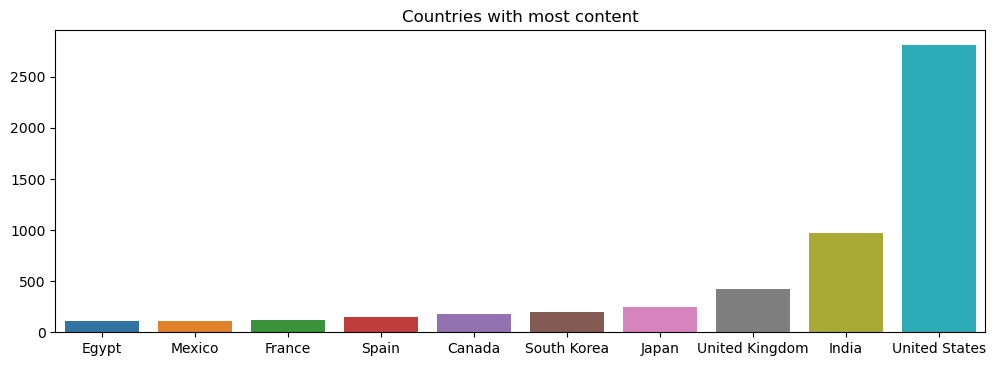

In [30]:
plt.figure(figsize=(12,4), dpi=100, facecolor='white')
sns.barplot(x=most_content.index, y=most_content.values)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Countries with most content')
plt.savefig('./images/countries_with_most_content.svg')
plt.show()

### *Question 7: Show all the TV shows that were released in any nordic country* <a class='anchor' id='q7'></a>

##### *Define nordic countries*

In [31]:
nordic_countries = ['Denmark', 'Finland', 'Iceland', 'Norway', 'Sweden']

##### *Create a dataframe containing only TV shows that were released in any nordic country*

In [32]:
tv_shows = df_tvshows[df_tvshows['country'].isin(nordic_countries)]

In [33]:
tv_shows.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
37,s38,TV Show,Angry Birds,NaN,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...",Finland,"September 16, 2021",2018,TV-Y7,1 Season,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h..."
617,s618,TV Show,Young Royals,NaN,"Edvin Ryding, Omar Rudberg, Malte Gårdinger, F...",Sweden,"July 1, 2021",2021,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Prince Wilhelm adjusts to life at his prestigi...
699,s700,TV Show,Katla,NaN,"Guðrún Eyfjörð, Íris Tanja Flygenring, Aliette...",Iceland,"June 17, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",The catastrophic eruption of subglacial volcan...


##### *Display the TV shows*

In [34]:
for i, title in enumerate(tv_shows['title']):
    if i < 9:
        print(f'0{i+1}: {title} ({tv_shows.iloc[i,5]})')
    else:
        print(f'{i+1}: {title} ({tv_shows.iloc[i,5]})')

01: Angry Birds (Finland)
02: Young Royals (Sweden)
03: Katla (Iceland)
04: LEGO Friends: The Power of Friendship (Denmark)
05: Home for Christmas (Norway)
06: Love & Anarchy (Sweden)
07: Borgen (Denmark)
08: Rita (Denmark)
09: Norsemen (Norway)
10: Caliphate (Sweden)
11: Bloodride (Norway)
12: The Valhalla Murders (Iceland)
13: Bonus Family (Sweden)
14: Quicksand (Sweden)
15: Hjørdis (Denmark)
16: Warrior (Denmark)
17: Fallet (Sweden)
18: The Day Will Come (Denmark)
19: Case (Iceland)
20: Gentlemen and Gangsters (Sweden)
21: Herrens veje (Denmark)
22: Lego Friends: Girls on a Mission (Denmark)
23: Nobel (Norway)
24: The Future of Water (Norway)
25: The Most Beautiful Hands of Delhi (Sweden)


### *Question 8: Show the top 10 directors with most movies and TV shows in Netflix* <a class='anchor' id='q8'></a>

- Get the number of movies and TV shows for each director using `.value_counts()`
- Get the top 10 directors by calling `.head(10)`

##### *Get the number of movies and TV shows for each director and display the top 10 with most content*

In [35]:
df['director'].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Name: director, dtype: int64

### *Question 9: Show all comedy movies starring either Jim Carrey or Jackie Chan* <a class='anchor' id='q9'></a>

- Define the required conditions for our analysis
- Create a dataframe based on the predefined conditions

##### *Define the required conditions*

In [36]:
# cast column to not be be null
not_null = df_movies['cast'].notnull()

# filter only comedy movies
comedies = df_movies['listed_in'].str.contains('Comedies')

# Jackie Chan to be in the cast
jackie_c = df_movies['cast'].str.contains('Jackie Chan')

# Jim Carrey to be in the cast
jim_carr = df_movies['cast'].str.contains('Jim Carrey')

##### *Create a dataframe based on the predefined conditions*

In [37]:
movies = df_movies[not_null & comedies & (jackie_c | jim_carr)]

In [38]:
movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
573,s574,Movie,Kung Fu Panda,"John Stevenson, Mark Osborne","Jack Black, Dustin Hoffman, Angelina Jolie, Ia...","United States, China","July 1, 2021",2008,PG,94 min,"Children & Family Movies, Comedies",When a powerful villain comes after peace in h...
574,s575,Movie,Kung Fu Panda 2,Jennifer Yuh Nelson,"Jack Black, Angelina Jolie, Dustin Hoffman, Ga...","United States, China","July 1, 2021",2011,PG,93 min,"Children & Family Movies, Comedies","With his fists up and belly full, Po embarks o..."
931,s932,Movie,Fun with Dick & Jane,Dean Parisot,"Jim Carrey, Téa Leoni, Alec Baldwin, Richard J...",United States,"May 1, 2021",2005,PG-13,91 min,Comedies,"After losing their high-paying corporate jobs,..."


##### *Display the movies*

In [39]:
for i, title in enumerate(movies['title']):
    if i < 9:
        print(f'0{i+1}: {title} ({"Jackie Chan" if "Jackie Chan" in movies.iloc[i,4] else "Jim Carrey"})')
    else:
        print(f'{i+1}: {title} ({"Jackie Chan" if "Jackie Chan" in movies.iloc[i,4] else "Jim Carrey"})')

01: Kung Fu Panda (Jackie Chan)
02: Kung Fu Panda 2 (Jackie Chan)
03: Fun with Dick & Jane (Jim Carrey)
04: Yes Man (Jim Carrey)
05: The Twins Effect II (Jackie Chan)
06: How the Grinch Stole Christmas (Jim Carrey)
07: Kung Fu Panda: Holiday (Jackie Chan)
08: Kung Fu Yoga (Jackie Chan)
09: Railroad Tigers (Jackie Chan)
10: Rumble in the Bronx (Jackie Chan)
11: Skiptrace (Jackie Chan)
12: The Spy Next Door (Jackie Chan)
13: The Tuxedo (Jackie Chan)


### *Question 10: What are the different maturity ratings for movies and TV shows?* <a class='anchor' id='q10'></a>

##### *Display the different maturity ratings*

In [40]:
# number of unique ratings
print(f'There are {df["rating"].nunique()} different maturity ratings.', end='\n\n')

# different ratings
print([rating for rating in df['rating'].unique()])

There are 14 different maturity ratings.

['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR']


##### *Plot the maturity ratings*

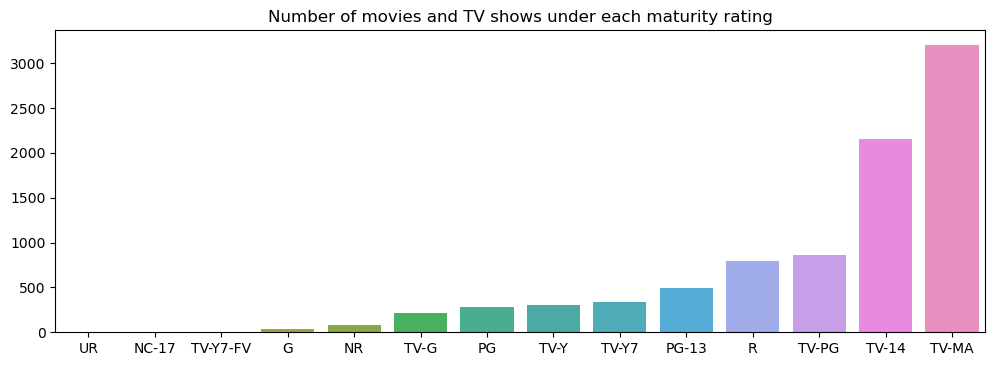

In [41]:
plt.figure(figsize=(12,4), dpi=100, facecolor='white')
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().sort_values(ascending=True).index[0:15])
plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of movies and TV shows under each maturity rating')
plt.savefig('./images/maturity_ratings.svg')
plt.show()

<p style='text-align: justify;'>
Most movies have the "TV-MA" rating. This is a rating assigned by the <i>TV Parental Guidelines</i> to television programmes designed for mature audiences only. Next in line is the "TV-14" rating, which represents programmes with content that may be unsuitable for children under 14. Third is the "TV-PG" rating, which represents programmes with content that may contain some material that parents may consider inappropriate for younger children, such as rare coarse language, some sexual content or moderate violence.
</p>

### *Question 11: What is the duration of the longest movie?* <a class='anchor' id='q11'></a>

- Extract information from `duration` column and create two new columns, `minutes` and `unit` (of measure)
- Convert `minutes` column to numeric

##### *Create the columns `minutes` and `unit` (of measure)*

In [42]:
df_movies[['minutes', 'unit']] = df_movies['duration'].str.split(' ', expand=True)

##### *Convert `minutes` column to numeric*

In [43]:
df_movies['minutes'] = pd.to_numeric(df_movies['minutes'])

In [44]:
df_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,min
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,min


##### *Display the result*

In [45]:
print(f'The duration of the longest movie is {df_movies["minutes"].max()} minutes.')

The duration of the longest movie is 312 minutes.


### *Question 12: Show the top 5 longest movies* <a class='anchor' id='q12'></a>

##### *Sort the dataframe by the `minutes` column in descending order*

In [46]:
df_movies = df_movies.sort_values(by='minutes', ascending=False)

##### *Display the movies*

In [47]:
for i in range(5):
    print(f'{i+1}: {df_movies.iloc[i, 2]} ({df_movies.iloc[i, 12]} min.)')

1: Black Mirror: Bandersnatch (312 min.)
2: Headspace: Unwind Your Mind (273 min.)
3: The School of Mischief (253 min.)
4: No Longer kids (237 min.)
5: Lock Your Girls In (233 min.)


### *Question 13: What is the average movie duration?* <a class='anchor' id='q13'></a>

##### *Display the average movie duration*

In [48]:
print(f'The average duration of a movie is {int(df_movies["minutes"].mean())} minutes.')

The average duration of a movie is 99 minutes.


##### *Plot the movie duration distribution*

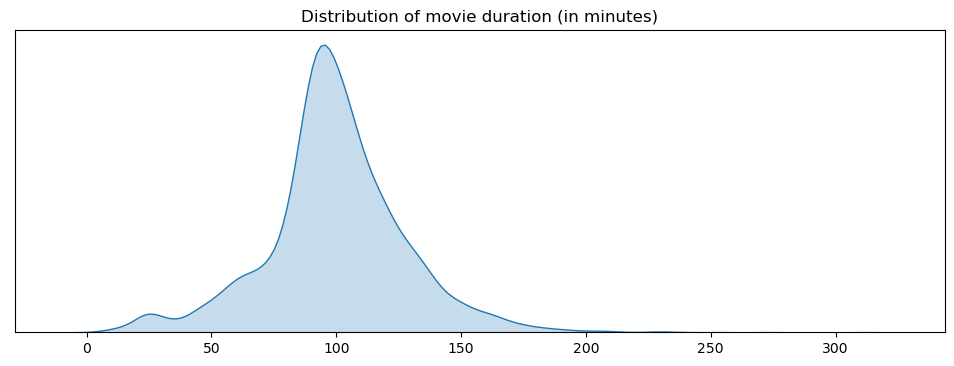

In [49]:
plt.figure(figsize=(12,4), dpi=100, facecolor='white')
sns.kdeplot(data=df_movies['minutes'], shade=True)
plt.xlabel(None)
plt.ylabel(None)
plt.yticks([])
plt.title('Distribution of movie duration (in minutes)')
plt.savefig('./images/movie_duration_distribution.svg')
plt.show()

### *Question 14: What are the TV shows released between 2010-2015 with at least 5 seasons?* <a class='anchor' id='q14'></a>

- Extract information from `duration` column and create a new column `seasons`
- Convert `seasons` column to numeric
- Define the required conditions for our analysis
- Create a dataframe based on the predefined conditions

##### *Create `seasons` column*

In [50]:
df_tvshows['seasons'] = df_tvshows['duration'].apply(lambda x: x.split(' ')[0])

##### *Convert `seasons` column to numeric*

In [51]:
df_tvshows['seasons'] = pd.to_numeric(df_tvshows['seasons'])

In [52]:
df_tvshows.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,seasons
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1


##### *Define the required conditions*

In [53]:
# released after 2010 (inclusive)
from_2010 = df_tvshows['release_year'] >= 2010

# released before 2015 (inclusive)
to_2015 = df_tvshows['release_year'] <= 2015

# with at least 5 seasons
at_least_5 = df_tvshows['seasons'] >= 5

##### *Create a dataframe based on the predefined conditions*

In [54]:
between = df_tvshows[(from_2010 & to_2015) & at_least_5].sort_values(by='seasons', ascending=False)

In [55]:
between.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,seasons
7844,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13
5801,s5804,TV Show,Forensic Files,NaN,Peter Thomas,United States,"September 1, 2016",2011,TV-MA,9 Seasons,"Crime TV Shows, Docuseries, Science & Nature TV",Detectives and crime lab technicians use the l...,9
8439,s8443,TV Show,The Office (U.S.),NaN,"Steve Carell, John Krasinski, Jenna Fischer, R...",United States,"January 1, 2016",2012,TV-14,9 Seasons,TV Comedies,This hit comedy chronicles the foibles of disg...,9


##### *Plot the TV shows released between 2010-2015 with at least 5 seasons*

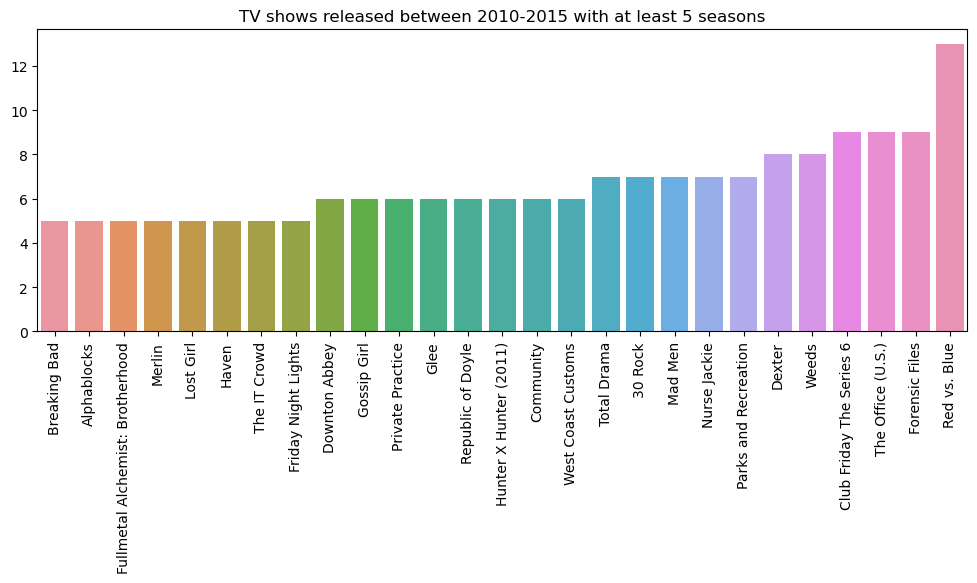

In [56]:
plt.figure(figsize=(12,4), dpi=100, facecolor='white')
sns.barplot(data=between, x='title', y='seasons', order=between.sort_values('seasons').title)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=90)
plt.title('TV shows released between 2010-2015 with at least 5 seasons')
plt.savefig('./images/tv_shows_2010_2015.svg')
plt.show()

### *Question 15: Show the top 10 actors with most appearances in movies and TV shows in US and UK* <a class='anchor' id='q15'></a>

##### *Create dataframes with movies and TV shows produced in US and UK*

In [57]:
# movies - usa / uk
mov_us = df_movies[(df_movies['country'] == 'United States') & (df_movies['cast'].notnull())]
mov_uk = df_movies[(df_movies['country'] == 'United Kingdom') & (df_movies['cast'].notnull())]

# tv shows - usa / uk
tvs_us = df_tvshows[(df_tvshows['country'] == 'United States') & (df_tvshows['cast'].notnull())]
tvs_uk = df_tvshows[(df_tvshows['country'] == 'United Kingdom') & (df_tvshows['cast'].notnull())]

##### *Count the total appearances of each actor in movies*

In [58]:
# movie - usa
act_usm = ', '.join(mov_us['cast']).split(', ')
counter_act_usm = Counter(act_usm).most_common(10)

# movie - uk
act_ukm = ', '.join(mov_uk['cast']).split(', ')
counter_act_ukm = Counter(act_ukm).most_common(10)

##### *Count the total appearances of each actor in TV shows*

In [59]:
# tv shows - usa
act_ustv = ', '.join(tvs_us['cast']).split(', ')
counter_act_ustv = Counter(act_ustv).most_common(10)

# tv shows - uk
act_uktv = ', '.join(tvs_uk['cast']).split(', ')
counter_act_uktv = Counter(act_uktv).most_common(10)

##### *Store the results into new interim dataframes*

In [60]:
us_movies = pd.DataFrame(counter_act_usm, columns=['Name', 'Movies'])
uk_movies = pd.DataFrame(counter_act_ukm, columns=['Name', 'Movies'])
us_tvshows = pd.DataFrame(counter_act_ustv, columns=['Name', 'TV Shows'])
uk_tvshows = pd.DataFrame(counter_act_uktv, columns=['Name', 'TV Shows'])

##### *Plot the results*

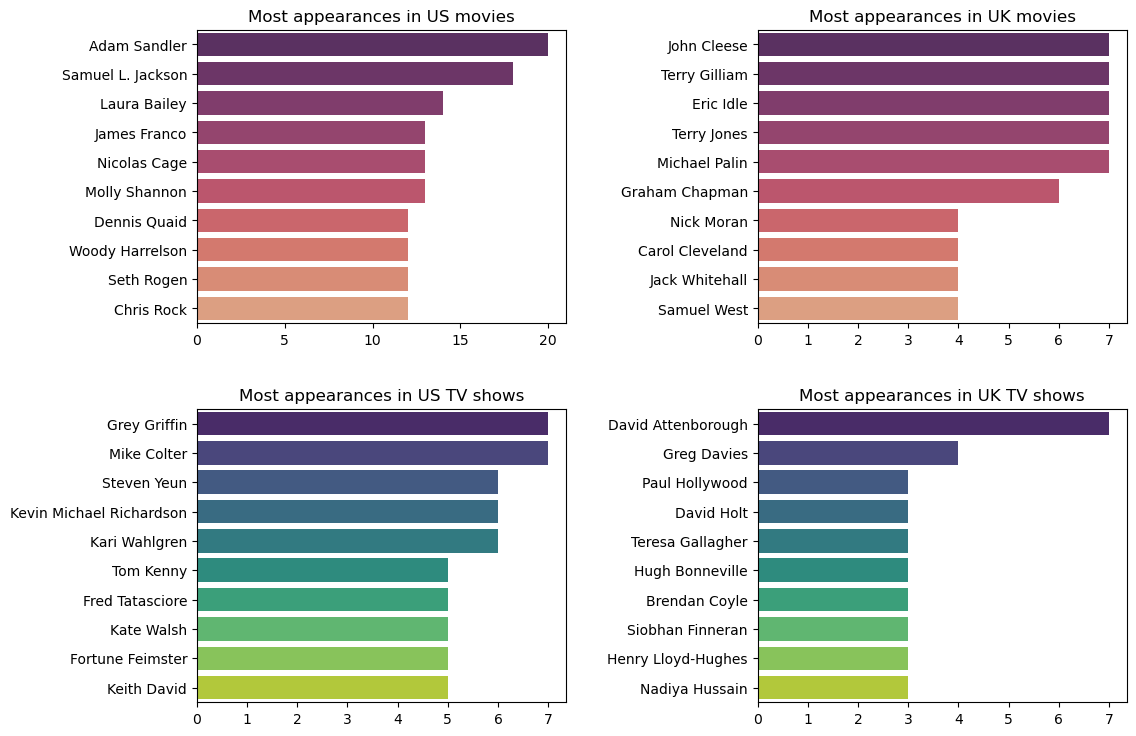

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(12,8), dpi=100, facecolor='white')

# us movies
sns.barplot(y=us_movies['Name'], x=us_movies['Movies'], ax=ax[0,0], palette='flare_r')
ax[0,0].set_xlabel(None)
ax[0,0].set_ylabel(None)
ax[0,0].set_title('Most appearances in US movies')

# us tv shows
sns.barplot(y=us_tvshows['Name'], x=us_tvshows['TV Shows'], ax=ax[1,0], palette='viridis')
ax[1,0].set_xlabel(None)
ax[1,0].set_ylabel(None)
ax[1,0].set_title('Most appearances in US TV shows')

# uk movies
sns.barplot(y=uk_movies['Name'], x=uk_movies['Movies'], ax=ax[0,1], palette='flare_r')
ax[0,1].set_xlabel(None)
ax[0,1].set_ylabel(None)
ax[0,1].set_title('Most appearances in UK movies')

# uk tv shows
sns.barplot(y=uk_tvshows['Name'], x=uk_tvshows['TV Shows'], ax=ax[1,1], palette='viridis')
ax[1,1].set_xlabel(None)
ax[1,1].set_ylabel(None)
ax[1,1].set_title('Most appearances in UK TV shows')

plt.tight_layout(pad=3)
plt.savefig('./images/most_appearances.svg')
plt.show()

---

*Thank you!*

---